# ¡Hola, Ivan!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Proyecto 13 

# Análisis para una estrategia de retencion de clientes en Model Fitness

La empresa Model Fitness enfrenta el problema más común relacionado a la perdida de clientes, un problema que se puede presentar en cualquier gimnasio.
Con la finalidad de buscar una solución a este problema se ha digitalizado y proporcionado perfiles de los clientes, esto con el propósito de poder realizar un análisis profundo y poder predecir la probabilidad de pérdida para posteriormente desarrollar 
estregias para la retención de los clientes.
Este proyecto tiene como objetivo identificar los factores clave que influyen en la rotación de clientes y sugerir medidas para mejorar la atención, reducir la pérdida y optimizar la interacción con los usuarios.

## Lectura de datos

### Importación de librerías 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

### Carga de datos en formato CSV

In [32]:
df_clients = pd.read_csv("/datasets/gym_churn_us.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

### Vista general de datos

In [33]:
df_clients.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Vista general de estructura de dataframe

In [34]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Características de dataframe 

In [35]:
df_clients.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Promedio de usuarios que se fueron y que se quedaron

In [36]:
clients_mean = df_clients.groupby('Churn').mean()

In [37]:
clients_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


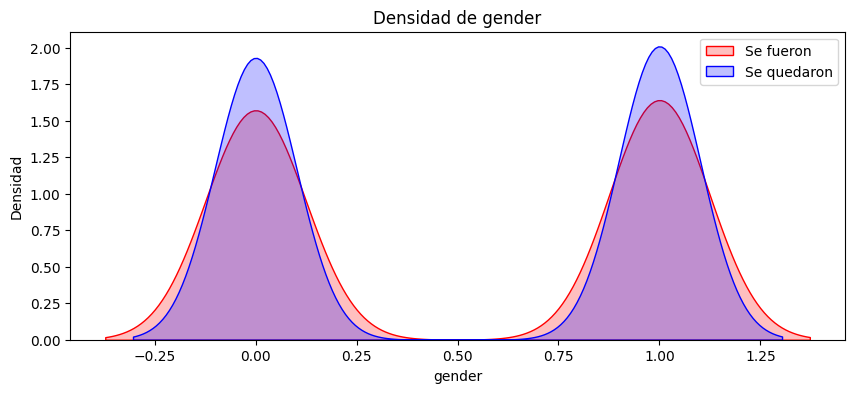

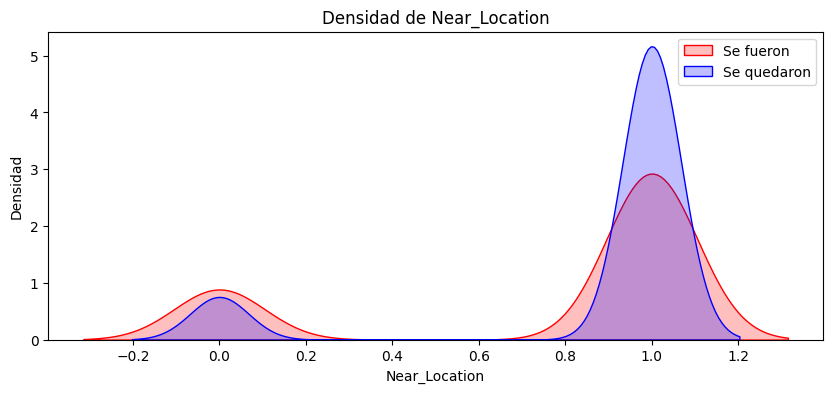

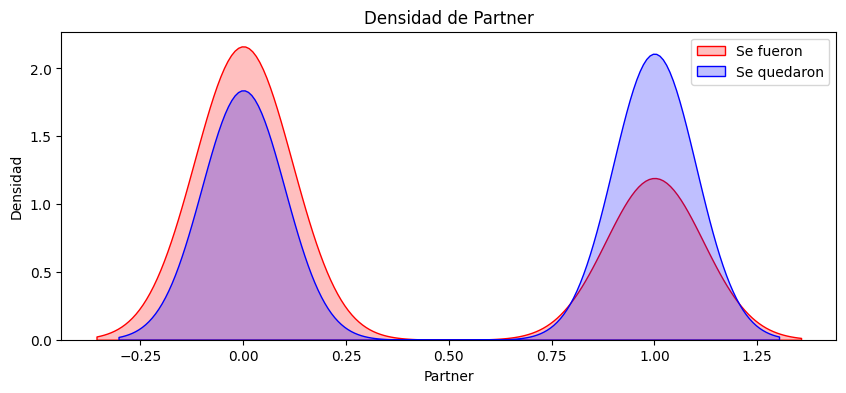

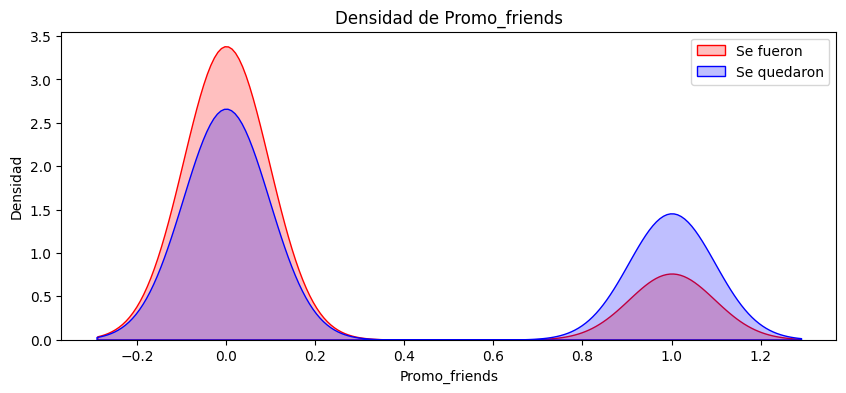

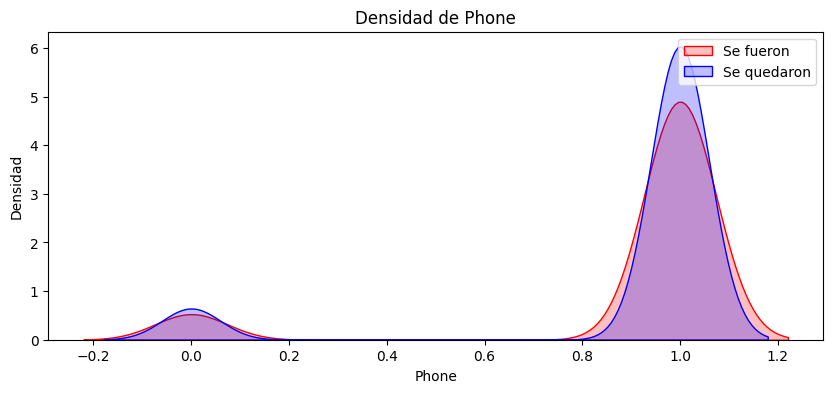

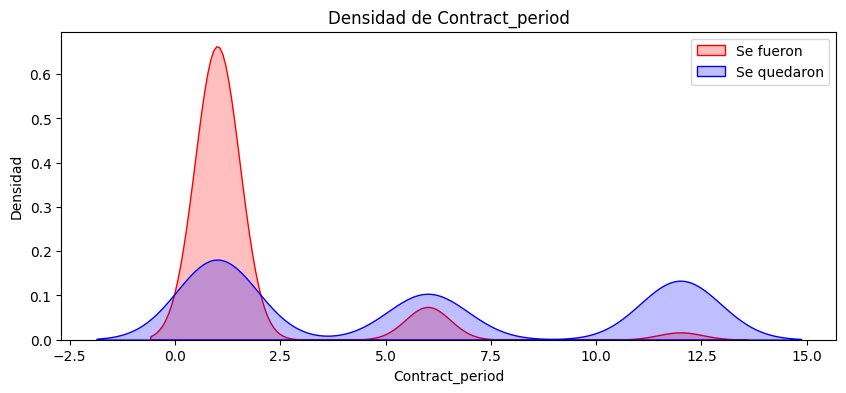

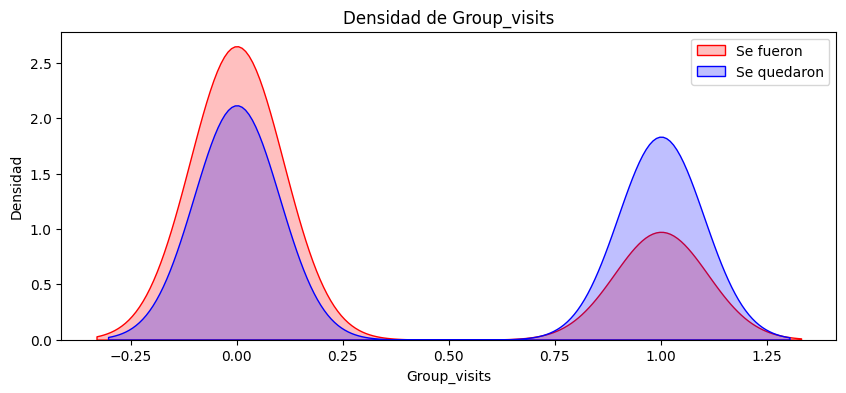

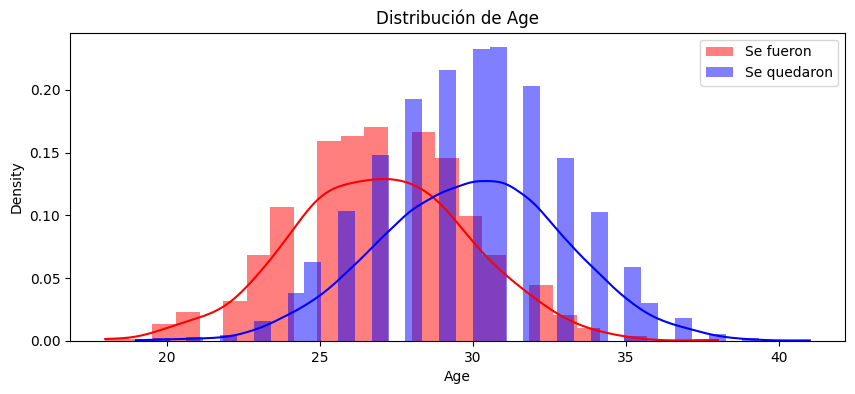

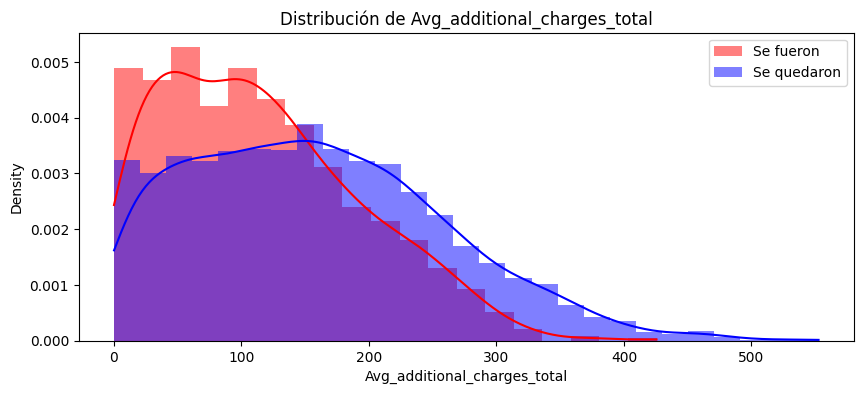

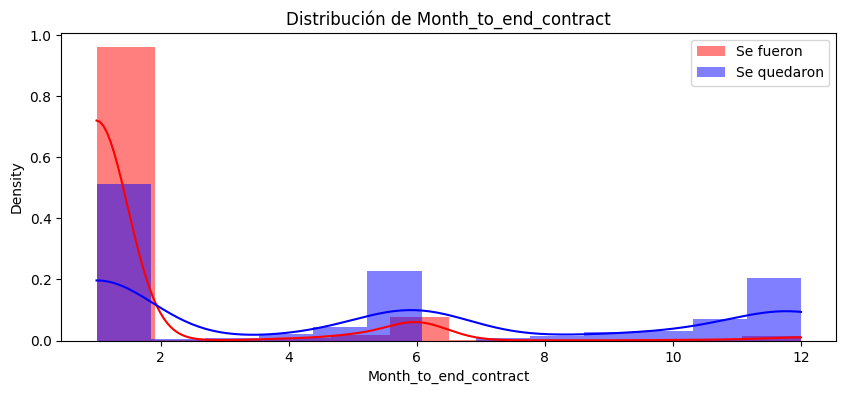

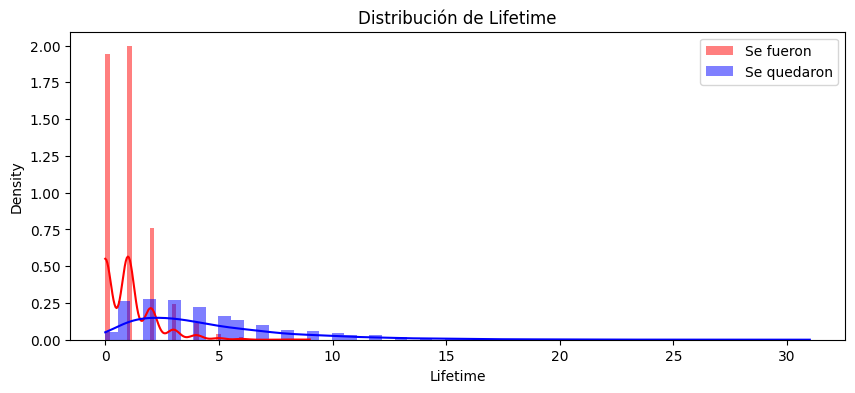

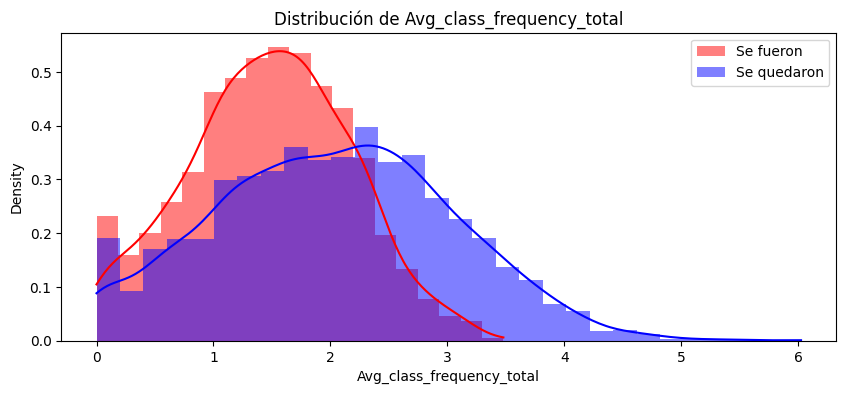

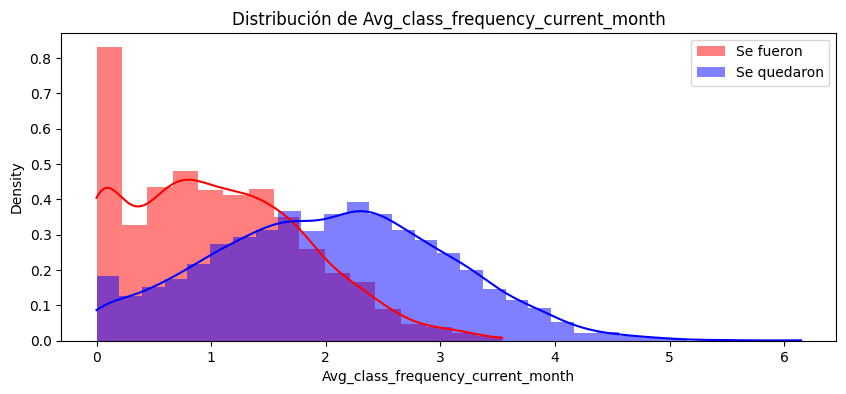

In [38]:
# Separación de variables discretas
binary_discrete_features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']

# Separación de datos 
df_churn = df_clients[df_clients['Churn'] == 1]
df_no_churn = df_clients[df_clients['Churn'] == 0]

# Creación de gráficos
for feature in df_clients.columns[:-1]:  # Excluye 'Churn'
    plt.figure(figsize=(10, 4))
    
    if feature in binary_discrete_features:
        # Función de densidad (KDE) para variables binarias/discretas
        sns.kdeplot(df_churn[feature], color='red', label='Se fueron', fill=True, common_norm=False)
        sns.kdeplot(df_no_churn[feature], color='blue', label='Se quedaron', fill=True, common_norm=False)
        plt.title(f'Densidad de {feature}')
        plt.xlabel(feature)
        plt.ylabel('Densidad')
        
    else:
        # Histograma para los que se fueron
        sns.histplot(df_churn[feature], color='red', label='Se fueron', kde=True, stat="density", linewidth=0)
        
        # Histograma para los que se quedaron
        sns.histplot(df_no_churn[feature], color='blue', label='Se quedaron', kde=True, stat="density", linewidth=0)
        plt.title(f'Distribución de {feature}')
    
    plt.legend()
    plt.show()

### Histograma de barras

### Matriz de correlación

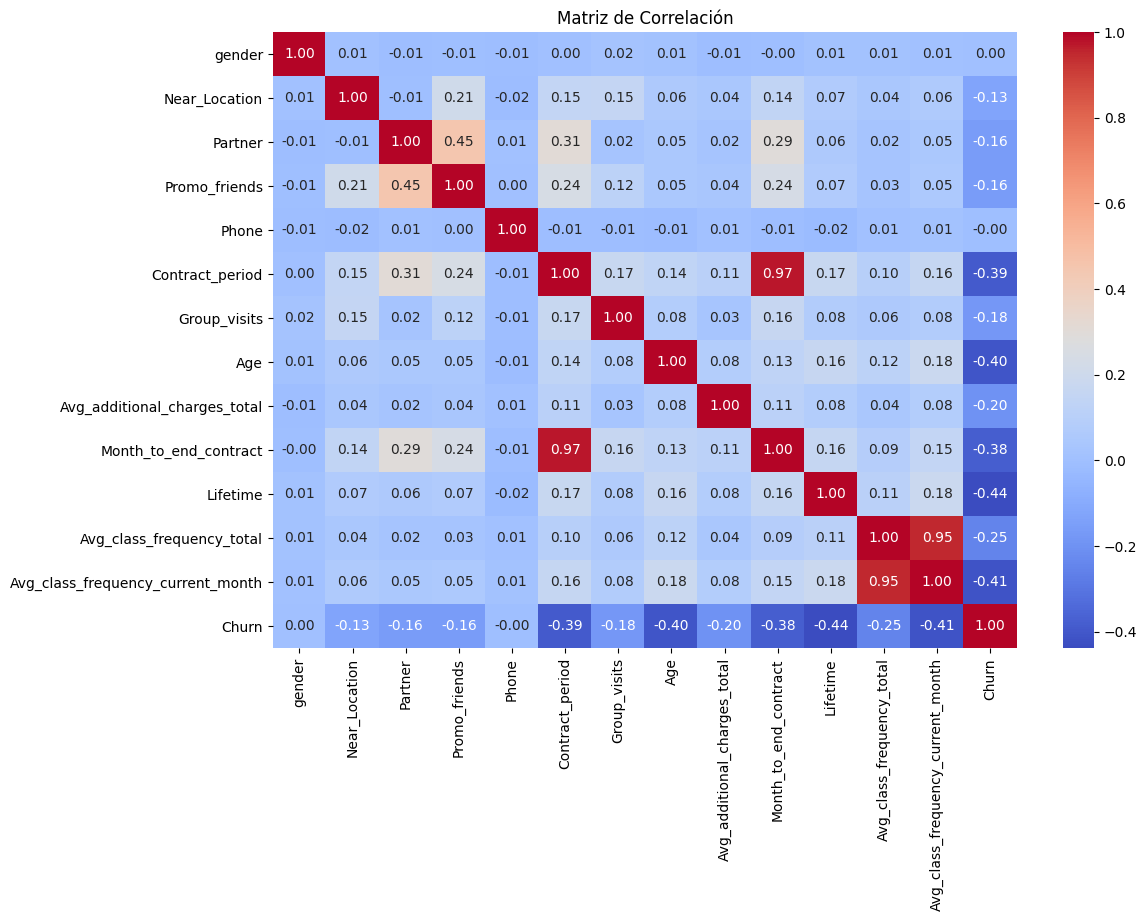

In [39]:
corr_matrix = df_clients.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Se puede apreciar la correlación que tiene churn con los demás datos teniendo una correlación negativa en diferentes campos como lo son el periodo de contrato, el tiempo de vida, la frecuencia y el mes que se finaliza el contrato, esto puede indicarnos que factores como el periodo del contrato o la frecuencia con la que los clientes asisten puede influir en la cancelación.

## Creación de modelo para predicción de cancelación de usuarios

### División de datos en conjunto de entrenamiento y validación

### Separación de características y variables objetivo 

In [40]:
X = df_clients.drop('Churn', axis=1)
y = df_clients['Churn']

### División de conjuntos de entrenamiento y validación

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

### Entrenamiento de modelo de regresión logística 

In [42]:
logReg = LogisticRegression(random_state=0, max_iter=200)
logReg.fit(X_train, y_train)
predict_logReg = logReg.predict(X_val)

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Entrenamiento de modelo de bosque aleatorio

In [43]:
randomFor = RandomForestClassifier(random_state = 0)
randomFor.fit(X_train, y_train)
predict_randomF = randomFor.predict(X_val)

### Evaluación de modelos

In [44]:
accuracy_logReg = accuracy_score(y_val, predict_logReg)
precision_logReg = precision_score(y_val, predict_logReg)
recall_logReg = recall_score(y_val, predict_logReg)

In [45]:
accuracy_randomF = accuracy_score(y_val, predict_randomF)
precision_randomF = precision_score(y_val, predict_randomF)
recall_randomF = recall_score(y_val, predict_randomF)

### Resultado 

In [46]:
print("Regresión Logística:")
print(f"Exactitud: {accuracy_logReg:.2f}")
print(f"Precisión: {precision_logReg:.2f}")
print(f"Recall: {recall_logReg:.2f}")

print("\nBosque Aleatorio:")
print(f"Exactitud: {accuracy_randomF:.2f}")
print(f"Precisión: {precision_randomF:.2f}")
print(f"Recall: {recall_randomF:.2f}")


Regresión Logística:
Exactitud: 0.92
Precisión: 0.86
Recall: 0.83

Bosque Aleatorio:
Exactitud: 0.92
Precisión: 0.84
Recall: 0.82


Se puede apreciar que la regresión logística brinda un mejor resultado a diferencia del bosque aleatorio, teniendo mejores resultados en exactitud y precisión.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección. En un futuro podrás hacer uso de optimización de hiperparámetros para mejorar los modelos.
</div>

## Creación de clusteres de usuarios

### Estandarización de datos

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clients.drop(columns=['Churn']))

### Creación de matris de distancias y dendrograma

In [48]:
linked_df = linkage(X_scaled, method = 'ward')

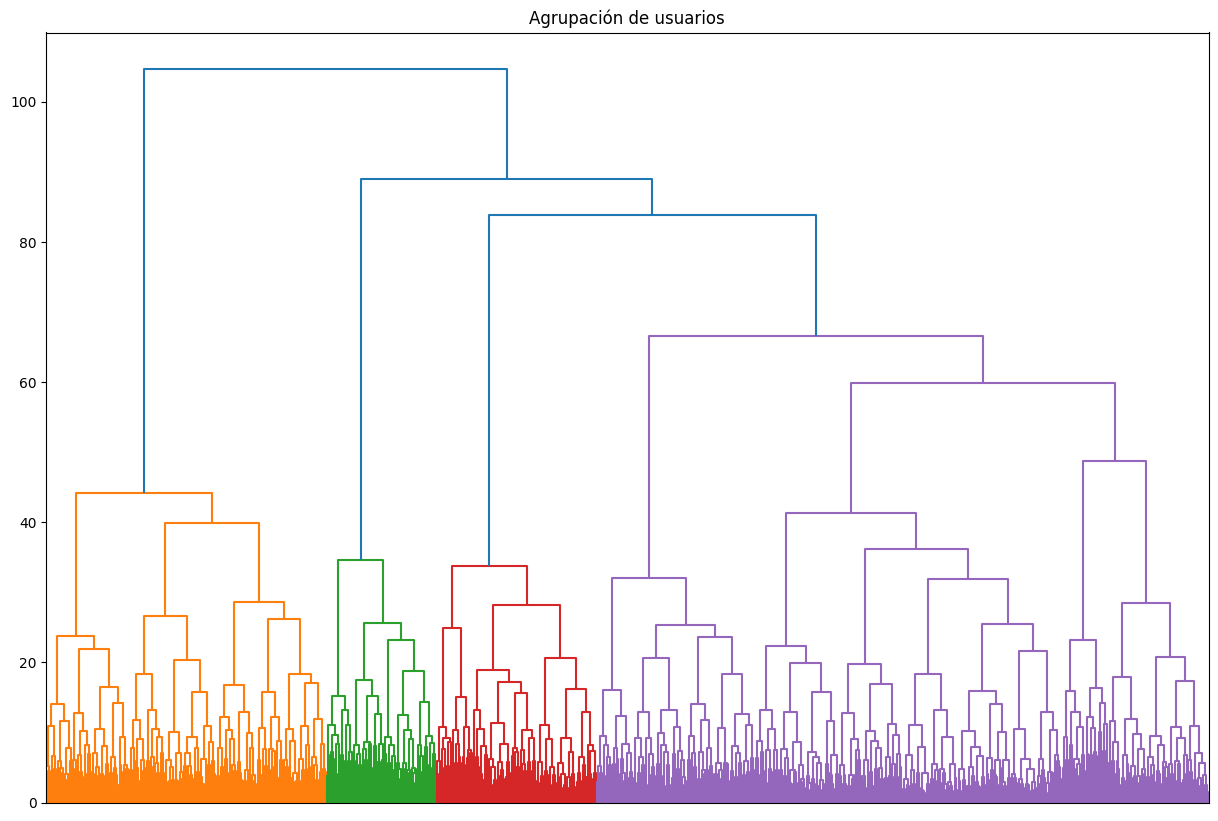

In [49]:
plt.figure(figsize=(15, 10))
dendrogram(linked_df, orientation = 'top')
plt.xticks([])
plt.title('Agrupación de usuarios')
plt.show()

### Análisis de clusteres

In [50]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X_scaled)

In [51]:
df_clients['Cluster'] = labels

In [52]:
df_clients.groupby(['Cluster']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.512102,0.750318,1.000000,0.453503,1.000000,2.545223,0.301911,28.513376,130.454023,2.359236,2.833121,1.363794,1.185381,0.393631
2,0.496257,0.941176,0.750802,0.540107,1.000000,11.371123,0.563636,29.990374,163.953881,10.395722,4.824599,2.026212,2.018551,0.023529
3,0.477934,0.809390,0.000000,0.086385,1.000000,1.859155,0.321127,28.139906,131.136778,1.782160,2.347418,1.325764,1.086659,0.551174
4,0.560241,0.865060,0.336145,0.196386,0.998795,2.737349,0.456627,30.196386,165.044885,2.527711,5.003614,2.925149,2.930414,0.048193


Analizando los valores medios se puede apreciar que los clusteres que cuentan con una tasa baja de cancelación a diferencia de los demás puede ser causado por la distancia a la que se encuentra el gimnasio, esto afecta de alguna forma la frecuencia con la que un usuario acude-

In [53]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10, 10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

### Distribución de clusteres

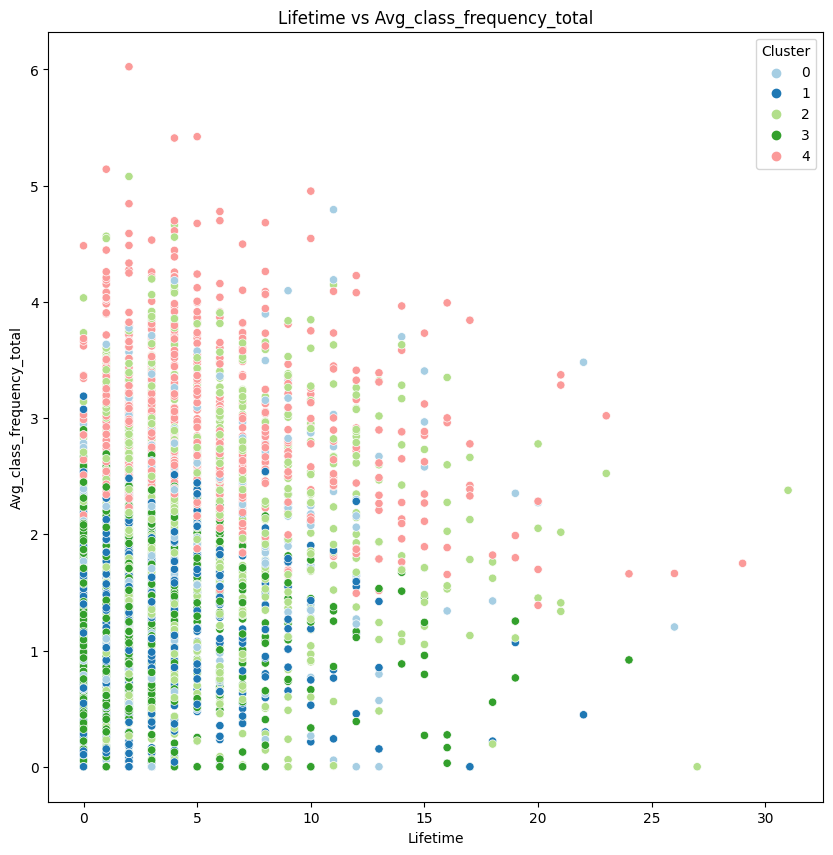

In [54]:
show_clusters_on_plot(df_clients, 'Lifetime', 'Avg_class_frequency_total', 'Cluster' )

### Tasa de cancelación

Cluster
0    0.267532
1    0.393631
2    0.023529
3    0.551174
4    0.048193
Name: Churn, dtype: float64


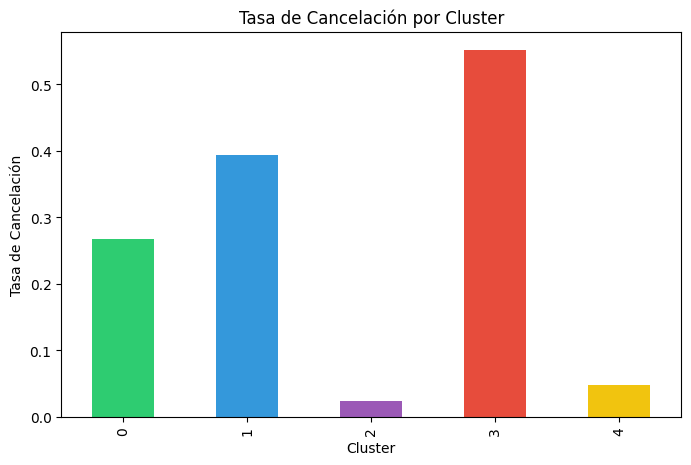

In [55]:
churn_rate = df_clients.groupby('Cluster')['Churn'].mean()
print(churn_rate)

plt.figure(figsize=(8, 5))
churn_rate.plot(kind='bar', color=['#2ECC71', '#3498DB', '#9B59B6', '#E74C3C', '#F1C40F'])

# Añadir títulos y etiquetas
plt.xlabel('Cluster')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Cluster')

# Mostrar el gráfico
plt.show()

Como se puede apreciar en el gráfico y en los valores de la taza de cancelación, se puede observar que si puede existir una gran diferencia en tasa de cancelaciones por grupos (clusters).

## Conclusiones

Los clientes tienden a cancelar con más frecuencia debido a la distancia, quiza no hay sesiones grupales de su interés o no hay ofertas atractivas.
Analizando el cluster con menor probabiliad de abandono se puede apreciar que los clientes que tienen esta caracteristica son aquellos que viven cerca del gimnasio y son quienes han estado acudiendo más tiempo teniendo una participación activa en las actividades grupales y teniendo un contrato largo así, estos pueden ser los clientes más fieles de acuerdo a esas características, a pesar de que tienen una baja probabilidad de abandono es de suma importancia continuar brindando un excelente servicio en el gimnasio, igualmente se podrá brindar un sistema de lealtad para estos clientes.
El cluster que puede tener una alta probabilidad de abandono cuenta con caracteristicas muy notables, tales como el no contar con alguna pareja en el gimnasio, tiempos cortos de contratación, su participación en clases grupales tiende a ser bajo, al igual que su frecuencia promedio de clases tanto en total como al mes tiende a ser más baja que los demás clusters, para este grupo o cluster se les puede brindar diferentes beneficios que sean atractivos como pueden ser promociones para la renovación de su contrato o incentivar a la participación en clases grupales.
Los clusters que se encuentran entre estos dos puede contener un cierto número de clientes leales y clientes que 


## Recomendaciones

### Mejores ofertas

Se puede optar por crear mejores ofertas en caso de ser referido por un amigo, ser participe de algun convenio laboral o incluso si el cliente acude por si mismo para inscribirse.
Hacer ofertas más atractivas puede ayudar a la retención de clientes.

### Implementación de más sesiones grupales atractivos

Probablemente a los usuarios no les sea llamativo las sesiones actuales, por ello sería una buena opción poder añadir o cambiar aquellas sesiones grupales que cuentan con un bajo numero de participantes con la finalidad de realizar actividades atractivas para los clientes, esto podrá ser un plus para que los clientes continuen acudiendo con frecuencia

### Una nueva sucursal

Una de las razones por las cuales los clientes abandonan el gimnasio es por la distancia, por ello puede considerarse la creación de una segunda sucursal con la finalidad de tener una mayor cercanía con los clientes nuevos y con aquellos que han abandonado previamente.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Ivan. Nos quedan algunos elementos por resolver antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>